In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data kindle
kindle_data = pd.read_csv("kindle_data-v2.csv")

# memastikan tiap kolom tidak mengandung spasi yang tak terlihat
kindle_data.columns = kindle_data.columns.str.strip()

# menampilkan tiga data teratas kindle
kindle_data.head(3)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [3]:
# menampilkan daftar kolom di dataset
kindle_data.columns

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

In [4]:
# menghapus kolom yang tidak diperlukan

kindle_data = kindle_data.drop(['imgUrl', 'productURL'], axis=1)
kindle_data.head(3)

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [5]:
# identifikasi missing value

kindle_data.isna().sum()

asin                     0
title                    0
author                 425
soldBy                9233
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [6]:
# Persentase missing value pada tiap kolom
kindle_data.isnull().sum().sort_values(ascending=False)/len(kindle_data)*100

publishedDate        36.825893
soldBy                6.936785
author                0.319304
asin                  0.000000
title                 0.000000
stars                 0.000000
reviews               0.000000
price                 0.000000
isKindleUnlimited     0.000000
category_id           0.000000
isBestSeller          0.000000
isEditorsPick         0.000000
isGoodReadsChoice     0.000000
category_name         0.000000
dtype: float64

In [7]:
# Hitung distribusi persentase soldBy
soldby_distribution = kindle_data['soldBy'].value_counts(normalize=True) * 100

# Tampilkan hasil
print(soldby_distribution)

soldBy
Amazon.com Services LLC                    68.426321
Random House LLC                            4.740492
Hachette Book Group                         3.823394
Penguin Group (USA) LLC                     3.540030
HarperCollins Publishers                    3.494014
Macmillan                                   2.540587
Simon and Schuster Digital Sales Inc        2.459857
Penguin Random House Publisher Services     1.929458
JOHN WILEY AND SONS INC                     1.926229
Simon & Schuster Digital Sales Inc.         1.411168
Pearson Education,Inc.                      1.059183
HarperCollins Publishing                    0.913869
Penguin Random House Grupo Editorial        0.762095
Cengage Learning                            0.605478
Editorial Planeta, S.A.U.                   0.488419
Harlequin Digital Sales Corp.               0.355214
PRH UK                                      0.289015
Macmillan Higher Education                  0.171149
De Marque                              

In [8]:
# Hapus kolom publishedDate
kindle_data = kindle_data.drop(['publishedDate'], axis=1)

# Input missing value 'soldBy' dengan nilai modus
soldBy_mode = kindle_data['soldBy'].mode()[0]
kindle_data['soldBy'] = kindle_data['soldBy'].fillna(soldBy_mode)

# Input missing value author dengan "Unknown"
kindle_data['author'] = kindle_data['author'].fillna("Unknown")


In [9]:
# Persentase missing value pada tiap kolom
kindle_data.isnull().sum().sort_values(ascending=False)/len(kindle_data)*100

asin                 0.0
title                0.0
author               0.0
soldBy               0.0
stars                0.0
reviews              0.0
price                0.0
isKindleUnlimited    0.0
category_id          0.0
isBestSeller         0.0
isEditorsPick        0.0
isGoodReadsChoice    0.0
category_name        0.0
dtype: float64

In [10]:
# Menyeleksi data yang dikategorikan sebagai data duplikat berdasarkan kolom asin
duplicate_asin = kindle_data[kindle_data.duplicated(subset='asin', keep=False)]
print(f"Jumlah data duplikat berdasarkan kolom asin = {len(duplicate_asin)}")

Jumlah data duplikat berdasarkan kolom asin = 0


In [11]:
# Menyeleksi data yang dikategorikan sebagai data duplikat namun berbeda code asin
duplicate_non_asin = kindle_data[kindle_data.duplicated(subset=['title', 'author', 'soldBy', 'stars','reviews', 'price',
                                                                'isKindleUnlimited', 'category_id', 'isBestSeller','isEditorsPick',
                                                                'isGoodReadsChoice', 'category_name'], keep=False)]
print(f"Jumlah data duplikat namun berbeda code asin = {len(duplicate_non_asin)}")

Jumlah data duplikat namun berbeda code asin = 12


In [12]:
# Menghapus data duplikat
kindle_data.drop_duplicates(subset=['title', 'author', 'soldBy', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'category_name'], keep='first',inplace=True, ignore_index=True)

In [13]:
# cek salah satu data duplikat
kindle_data.loc[kindle_data['title'] == 'Single Variable Calculus: Early Transcendentals']

,asin,title,author,soldBy,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name
13104,B00QXKGOCE,Single Variable Calculus: Early Transcendentals,James Stewart,Cengage Learning,4.3,0,46.99,False,15,False,False,False,Science & Math


In [14]:
# Menyeleksi data yang dikategorikan sebagai data duplikat dengan jumlah reviews yg berbeda
duplicate_reviews = kindle_data[kindle_data.duplicated(subset=['title', 'author','soldBy','stars', 'price', 'category_name'], 
                                                       keep=False)]
print(f"Jumlah data duplikat dengan jumlah reviews yg berbeda = {len(duplicate_reviews)}")

Jumlah data duplikat dengan jumlah reviews yg berbeda = 4


In [15]:
# Agregasi dengan groupby
kindle_data = kindle_data.groupby(
    ['title', 'author', 'soldBy', 'stars', 'price', 'category_name'],
    as_index=False).agg({
    'reviews': 'sum',
    'asin': 'first',
    'isKindleUnlimited': 'first',
    'category_id': 'first',
    'isBestSeller': 'first',
    'isEditorsPick': 'first',
    'isGoodReadsChoice': 'first',})

In [16]:
# cek salah satu data duplikat
kindle_data.loc[kindle_data['title'] == 'DK Eyewitness New Zealand (Travel Guide)']

,title,author,soldBy,stars,price,category_name,reviews,asin,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice
25185,DK Eyewitness New Zealand (Travel Guide),DK Eyewitness,Penguin Group (USA) LLC,4.6,10.99,Travel,122,B0988Z1ZD6,False,24,False,False,False


In [17]:
# Menyeleksi data yang dikategorikan sebagai data duplikat dengan rerata stars yg berbeda
duplicate_stars = kindle_data[kindle_data.duplicated(subset=['title', 'author','soldBy','reviews', 'price', 'category_name'], 
                                                     keep=False)]
print(f"Jumlah data duplikat dengan rerata stars yg berbeda = {len(duplicate_stars)}")

Jumlah data duplikat dengan rerata stars yg berbeda = 100


In [18]:
# cek salah satu data duplikat
kindle_data.loc[kindle_data['title'] == 'Writing about Writing']

,title,author,soldBy,stars,price,category_name,reviews,asin,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice
131351,Writing about Writing,Elizabeth Wardle,Macmillan Higher Education,0.0,36.07,Reference,0,B0BJ114G3Y,False,22,False,False,False
131352,Writing about Writing,Elizabeth Wardle,Macmillan Higher Education,4.1,36.07,Reference,0,B07WQYX4TF,False,22,False,False,False


In [19]:
# Ubah data yg kolom stars nya 0 menjadi NaN supaya data tidak salah hitung saat dihitung mean nya
kindle_data['stars'] = kindle_data['stars'].replace(0, np.nan)

# Agregasi dengan groupby
kindle_data = kindle_data.groupby(
    ['title', 'author','soldBy','reviews', 'price', 'category_name'],
    as_index=False).agg({
    'stars': 'mean',
    'asin': 'first',
    'isKindleUnlimited': 'first',
    'category_id': 'first',
    'isBestSeller': 'first',
    'isEditorsPick': 'first',
    'isGoodReadsChoice': 'first',})

In [20]:
# cek salah satu data duplikat
kindle_data.loc[kindle_data['title'] == 'Writing about Writing']

,title,author,soldBy,reviews,price,category_name,stars,asin,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice
131302,Writing about Writing,Elizabeth Wardle,Macmillan Higher Education,0,36.07,Reference,4.1,B0BJ114G3Y,False,22,False,False,False


In [21]:
# mengubah nilai stars yang bernilai NaN menjadi 0 kembali
kindle_data['stars'] = kindle_data['stars'].replace(np.nan, 0)

In [22]:
# Cek statistik deskriptif setelah menangani duplicate value
kindle_data.describe()

,reviews,price,stars,category_id
count,133044.000000,133044.000000,133044.000000,133044.000000
mean,887.762627,15.116903,4.404590,16.286642
std,5105.972412,22.235318,0.744177,8.418266
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.990000,4.400000,9.000000
50%,4.000000,9.990000,4.500000,16.000000
75%,366.000000,14.990000,4.700000,23.000000
max,618227.000000,682.000000,5.000000,31.000000


In [23]:
# hapus data dengan nilai price = 0
before = len(kindle_data)
kindle_data = kindle_data[kindle_data['price'] != 0]
after = len(kindle_data)
print(f"{before - after} baris dengan price = 0 telah dihapus.")

4063 baris dengan price = 0 telah dihapus.


In [24]:
# Cek statistik deskriptif
kindle_data.describe()

,reviews,price,stars,category_id
count,128981.000000,128981.000000,128981.000000,128981.000000
mean,847.199727,15.593097,4.405184,16.215877
std,4863.522486,22.417814,0.744257,8.419084
min,0.000000,0.500000,0.000000,1.000000
25%,0.000000,5.990000,4.400000,9.000000
50%,5.000000,9.990000,4.500000,16.000000
75%,363.000000,14.990000,4.700000,23.000000
max,618227.000000,682.000000,5.000000,31.000000


In [25]:
outlier_columns = ['reviews','price', 'stars']

print(f"Total columns which has outliers: {len(outlier_columns)}")

Total columns which has outliers: 3


C:\Users\talit\AppData\Local\Temp\ipykernel_13308\577966690.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


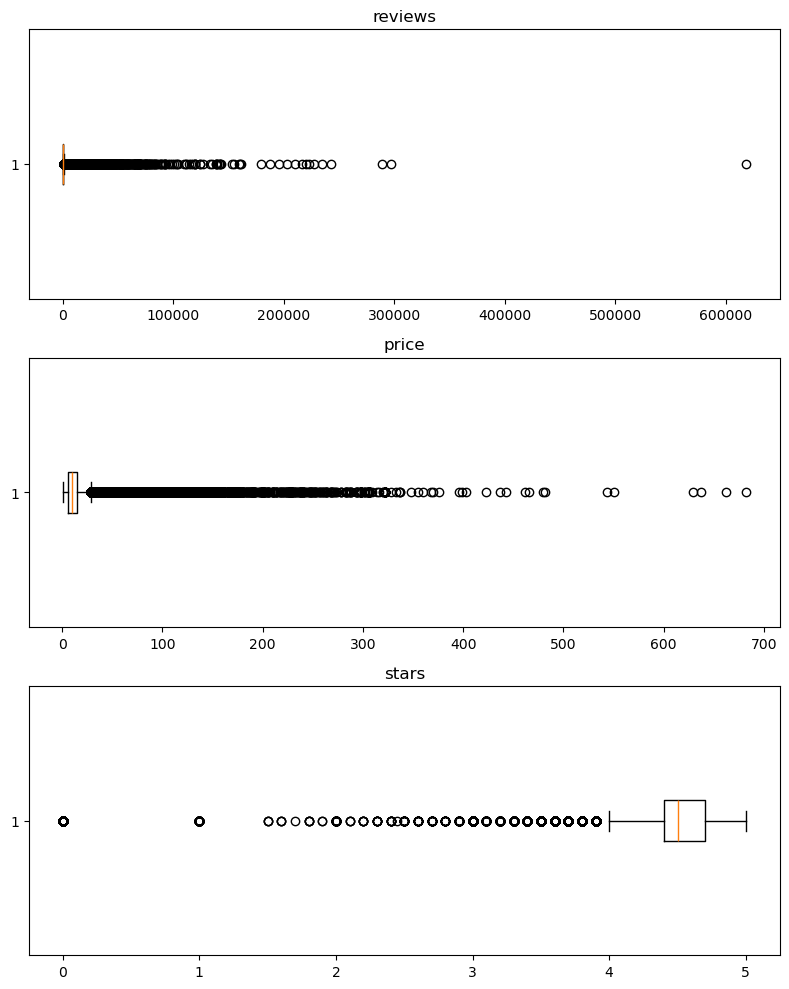

In [26]:
# create subplots with 4x2 grids and size 10x10
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

# Loop untuk buat boxplot tiap kolom
for i in range(3):
    ax[i].boxplot(kindle_data[outlier_columns[i]], vert=False)
    ax[i].set_title(outlier_columns[i], fontsize=12)


# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [27]:
def detect_outliers_iqr(data):
    
    # initialize list that contains the outliers
    outliers = []
    
    # sort data values
    data = sorted(data)
    
    # compute q1 and q3
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # compute the IQR
    IQR = q3-q1
    
    # set the lower bound and upper bound
    ## note that we can play with value 1.5 to widen or narrow the range
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
   # print computed lower and upper bound of a particular column
    print("lower:",lower_bound, "upper:", upper_bound)
    
    # for each data point, decide whether it falls below lower bound or above upper ground
    for i in data:
        if (i < lower_bound or i > upper_bound):
            
            outliers.append(i)
            
    return outliers

In [28]:
for col in outlier_columns:

    outlier = detect_outliers_iqr(kindle_data[col])

    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print("percentage of outliers in column", 
          f"'{str(col)}'", "is", np.round(len(outlier)*100/len(kindle_data),2),"%")
    print()


lower: -544.5 upper: 907.5
number of outliers in column 'reviews' is 20112
percentage of outliers in column 'reviews' is 15.59 %

lower: -7.51 upper: 28.490000000000002
number of outliers in column 'price' is 14516
percentage of outliers in column 'price' is 11.25 %

lower: 3.9500000000000006 upper: 5.15
number of outliers in column 'stars' is 7018
percentage of outliers in column 'stars' is 5.44 %



In [29]:
reviews_is_0 = len(kindle_data[kindle_data["reviews"] == 0])

print(f"Presentase data dengan jumlah reviews = 0 : {np.round(reviews_is_0*100/len(kindle_data),2)}%")

Presentase data dengan jumlah reviews = 0 : 48.23%


<Axes: xlabel='reviews', ylabel='Count'>

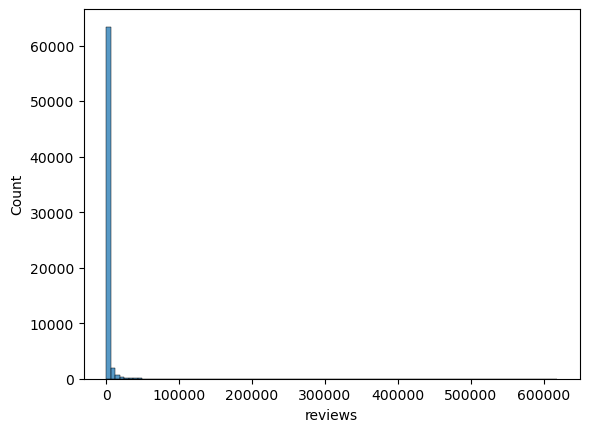

In [31]:
# Plot histogram untuk kolom reviews
sns.histplot(kindle_data["reviews"].loc[kindle_data['reviews'] != 0], bins=100)

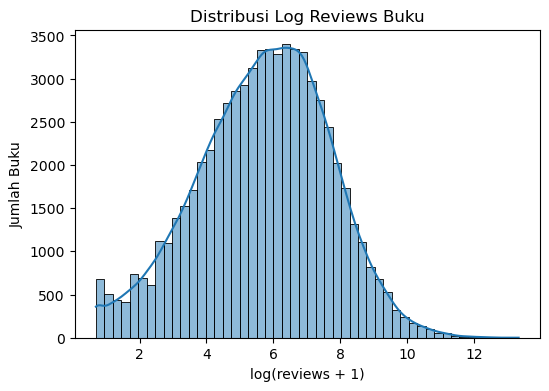

In [32]:
# Kolom baru: log transform reviews
kindle_data['log_reviews'] = np.log1p(kindle_data['reviews'])

plt.figure(figsize=(6,4))
sns.histplot(kindle_data['log_reviews'].loc[kindle_data['log_reviews'] != 0], kde=True, bins=50)
plt.title("Distribusi Log Reviews Buku")
plt.xlabel("log(reviews + 1)")
plt.ylabel("Jumlah Buku")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

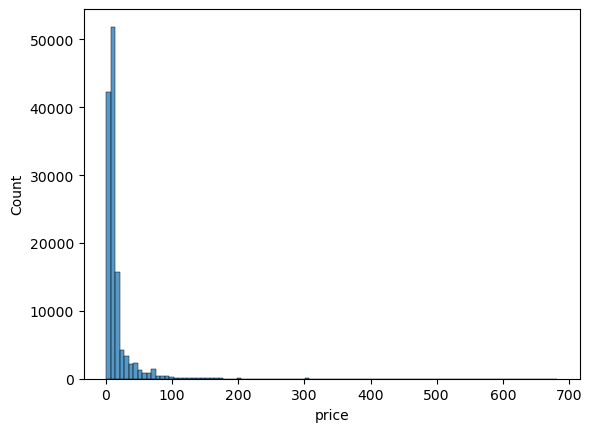

In [33]:
# Plot histogram untuk kolom price
sns.histplot(kindle_data["price"], bins=100)

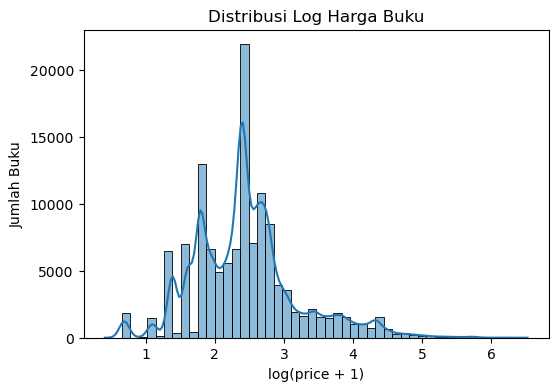

In [34]:
# Tambahkan kolom baru hasil transformasi log
kindle_data['log_price'] = np.log1p(kindle_data['price'])  # log(price + 1)

plt.figure(figsize=(6,4))
sns.histplot(kindle_data['log_price'], kde=True, bins=50)
plt.title("Distribusi Log Harga Buku")
plt.xlabel("log(price + 1)")
plt.ylabel("Jumlah Buku")
plt.show()

<Axes: xlabel='stars', ylabel='Count'>

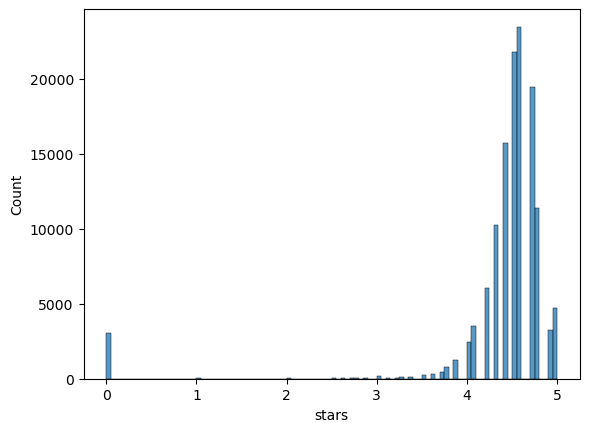

In [35]:
# Plot histogram untuk kolom stars
sns.histplot(kindle_data["stars"], bins=100)

In [36]:
# mengecek tipe data tiap kolom
kindle_data.dtypes

title                 object
author                object
soldBy                object
reviews                int64
price                float64
category_name         object
stars                float64
asin                  object
isKindleUnlimited       bool
category_id            int64
isBestSeller            bool
isEditorsPick           bool
isGoodReadsChoice       bool
log_reviews          float64
log_price            float64
dtype: object

In [37]:
# cek inconsistent format kolom soldBy
kindle_data["soldBy"].value_counts().sort_index()

soldBy
Amazon Digital Services LLC GU                 1
Amazon Digital Services LLC HN                 1
Amazon Digital Services LLC MK                 1
Amazon.com                                    12
Amazon.com Services LLC                    90150
Book Republic                                  2
Cengage Learning                             736
DC Comics                                      2
De Marque                                     81
Disney Book Group                            133
EDIGITA                                       24
Editorial Planeta, S.A.U.                    605
Flammarion Lt.                                28
Gallimard Lt.                                 37
Games Workshop                                79
GeMS SpA                                      13
Giunti Editore S.p.A.                          3
Hachette Book Group                         4673
Harlequin Digital Sales Corp.                440
Harper Collins                               114
HarperCollins

In [38]:
# mapping inkonsisten kolom soldBy ke format yang benar
publisher_format = { "HarperCollins Publishers" : "Harper Collins", 
                    "HarperCollins Publishing" : "Harper Collins", 
                    "Simon and Schuster Digital Sales Inc" : "Simon & Schuster Digital Sales Inc."}

# mengubah hasil mapping sehingga nilai menjadi seragam
kindle_data["soldBy"] = kindle_data["soldBy"].replace(publisher_format)

# cek ulang format soldBy
kindle_data["soldBy"].value_counts().sort_index()

soldBy
Amazon Digital Services LLC GU                 1
Amazon Digital Services LLC HN                 1
Amazon Digital Services LLC MK                 1
Amazon.com                                    12
Amazon.com Services LLC                    90150
Book Republic                                  2
Cengage Learning                             736
DC Comics                                      2
De Marque                                     81
Disney Book Group                            133
EDIGITA                                       24
Editorial Planeta, S.A.U.                    605
Flammarion Lt.                                28
Gallimard Lt.                                 37
Games Workshop                                79
GeMS SpA                                      13
Giunti Editore S.p.A.                          3
Hachette Book Group                         4673
Harlequin Digital Sales Corp.                440
Harper Collins                              5551
INTERFORUM   

In [39]:
# cek inconsistent format kolom category_name
kindle_data["category_name"].value_counts().sort_index()

category_name
Arts & Photo graphy             4807
Biographies & Memoirs           5302
Business & Money                2517
Children's eBooks               4776
Comics                           470
Computers & Technology          5432
Cookbooks, Food & Wine          5214
Crafts, Hobbies & Home          5373
Education & Teaching            4932
Engineering & Transportation    6027
Foreign Language                5484
Health, Fitness & Dieting       1542
History                         1986
Humor & Entertainment           3872
LGBTQ+ eBooks                   5435
Law                             4888
Literature & Fiction            4104
Medical                         2545
Mystery, Thriller & Suspense    6183
Nonfiction                       876
Parenting & Relationships       5673
Politics & Social Sciences      4050
Reference                       3292
Religion & Spirituality         4877
Romance                         2175
Science & Math                  5869
Science Fiction & Fantas

In [40]:
# cek inconsistent format kolom author 50 data teratas
kindle_data["author"].value_counts().sort_index().head(50)

author
"Termite" Terry Singleton                                 2
'El Pela' Gonzalo Romero                                  4
(Chef) Dominique Ansel                                    2
(ISC)² Corporate                                          1
(John D.) J. D. Turner                                    1
(Journalist) Leigh Gallagher                              1
(K.O.B.) Kayy0hBee                                        1
(Musician) KRS-One                                        1
(Musician) Sting                                          1
(Psychotherapist) Richard O'Connor                        1
(日)高野和明                                                   1
, Annie's                                                 2
, Buronson,Hara, Tetsuo                                   1
, ONE                                                     2
, Patabot                                                 1
, Reemus                                                  1
, The Arbinger Institute         

In [41]:
# bersihkan hanya karakter koma, titik, dan strip di awal/akhir
kindle_data['author'] = kindle_data['author'].str.replace(r'^[,.\-]+|[,.\-]+$', '', regex=True)

# memastikan tiap data tidak mengandung spasi yang tak terlihat
kindle_data['author'] = kindle_data['author'].str.strip()

# cek inconsistent format kolom author
kindle_data["author"].value_counts().sort_index().head(50)

author
"Termite" Terry Singleton                                 2
'El Pela' Gonzalo Romero                                  4
(Chef) Dominique Ansel                                    2
(ISC)² Corporate                                          1
(John D.) J. D. Turner                                    1
(Journalist) Leigh Gallagher                              1
(K.O.B.) Kayy0hBee                                        1
(Musician) KRS-One                                        1
(Musician) Sting                                          1
(Psychotherapist) Richard O'Connor                        1
(日)高野和明                                                   1
123VIETNAMESE LANGUAGE CENTER                             2
13 Pitch Black Cats                                       3
1849-1914 Riis, Jacob A. (Jacob August)                   1
1881-1975 Wodehouse, P. G. (Pelham Grenville)             1
1:Dominique Lapierre | Larry Collins | 2:Adolfo Martín    1
1st Echo Publishing              

In [42]:
# Cari baris yang kolom 'author' mengandung 'unknown'
kindle_data[kindle_data['author'].str.contains("unknown author", case=False, na=False)]


,title,author,soldBy,reviews,price,category_name,stars,asin,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,log_reviews,log_price
10720,Aviation Weather Handbook (2023),unknown author,Amazon.com Services LLC,0,33.92,Engineering & Transportation,5.0,B0BVGGM3P7,False,11,False,False,False,0.000000,3.553060
85079,Scales and Finger Exercises: Schirmer Library ...,unknown author,Amazon.com Services LLC,533,9.49,Arts & Photo graphy,4.7,B0BM3LBK6C,False,1,False,False,False,6.280396,2.350422


In [43]:
kindle_data["author"].value_counts().sort_index()[2100:2150]

author
Alida V. Merlo                 1
Aliette de Bodard              1
Alijandra Mogilner             1
Alin Armstrong                 1
Alina Adams                    2
Alina Jacobs                   2
Alina Kaczorowska-Ireland      1
Alina May                      1
Alina Nicoara                  1
Alina Not                      6
Alina Vincent                  3
Alina Wheeler                  1
Aline Ash                      1
Aline Countess of Romanones    2
Aline Kominsky Crumb           2
Aline Pádua                    1
Alireza Bahadori               1
Alireza Haghighat              1
Alisa Childers                 2
Alisa DiLorenzo                2
Alisa Fleming                  1
Alisa Gaunder                  1
Alisa Hatchenson               1
Alisa Keeton                   2
Alisa Lynn Valdés              1
Alisa Ortiz                    1
Alisa Roth                     1
Alisa Vitti                    3
Alisa Zipursky                 1
Alisha Cuarenta                1
Ali

In [44]:
# mapping inkonsisten kolom soldBy ke format yang benar
author_format = {"A.E Colonna" : "A.E. Colonna", 
                "(Psychotherapist) Richard O'Connor" : "Richard O'Connor", 
                "AA Grapevine" : "AA Grapevine Inc",
                "AA. VV" : "AA.VV",
                "AK LANDOW" : "AK Landow",
                "ARRL" : "ARRL Inc",
                "Aaron Dietzen Aka 'the Sketchup Guy'" : "Aaron Dietzen aka 'The SketchUp Guy'",
                "Abigail Levrini" : "Abigail L. Levrini",
                "Adam Rutherford PhD" : "Adam Rutherford",
                "Admiral James Stavridis USN" : "Admiral James Stavridis",
                "Alain De Botton" : "Alain de Botton",
                "Alda Sigmundsdottir" : "Alda Sigmundsdóttir",
                "Aleksandr Solzhenitsyn" : "Aleksandr I. Solzhenitsyn",
                "Aleksandr Solzhenitsyn Solzhenitsyn" : "Aleksandr I. Solzhenitsyn",
                "Alexander Macdonald" : "Alexander MacDonald",
                "Alexandre Dumas père" : "Alexandre Dumas",
                "unknown" : "Unknown",
                "unknown author" : "Unknown",}

# mengubah hasil mapping sehingga nilai menjadi seragam
kindle_data["author"] = kindle_data["author"].replace(author_format)

In [45]:
# Cek statistik deskriptif
kindle_data.describe()

,reviews,price,stars,category_id,log_reviews,log_price
count,128981.000000,128981.000000,128981.000000,128981.000000,128981.000000,128981.000000
mean,847.199727,15.593097,4.405184,16.215877,2.948619,2.446420
std,4863.522486,22.417814,0.744257,8.419084,3.177898,0.759903
min,0.000000,0.500000,0.000000,1.000000,0.000000,0.405465
25%,0.000000,5.990000,4.400000,9.000000,0.000000,1.944481
50%,5.000000,9.990000,4.500000,16.000000,1.791759,2.396986
75%,363.000000,14.990000,4.700000,23.000000,5.897154,2.771964
max,618227.000000,682.000000,5.000000,31.000000,13.334613,6.526495


In [46]:
# Ubah urutan kolom
new_order = ['asin', 'title', 'author', 'soldBy', 'stars','reviews', 'price', 'isKindleUnlimited', 
             'category_id', 'isBestSeller','isEditorsPick', 'isGoodReadsChoice', 'category_name', 
             'log_reviews', 'log_price']
kindle_data = kindle_data[new_order]


# Export_data
kindle_data.to_csv("Kindle_Data_Cleaned_2.csv", index=False)